# Internet Advertisements

Image data has been given from the internet. The aim is to predict if an image is an Advertisement (Ad) or not an Advertisement (non-Ad)

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.model_selection import train_test_split
import missingno as msno
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [22]:
data_train = pd.read_csv("data/training.csv",header=None)
data_test = pd.read_csv("data/test.csv",header=None)
print("Shape of the Training Data :",data_train.shape)
print("Shape of the Testing Data :",data_test.shape)

Shape of the Training Data : (2623, 1559)
Shape of the Testing Data : (656, 1558)


/home/krushika/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
def preprocess_data(df):
    df.rename(columns={1558:"Target"},inplace=True)
    df.replace({'nonad.':0,'ad.':1},inplace=True)
    df.replace('[?]',np.nan,inplace=True,regex=True)
    df.head()
    
def plot_missing_data(df):
    df_missing = df[df.columns[:3]]
    sns.heatmap(df_missing.isnull(),cbar=False)
    plt.show()
    
def check_class_dist(df):
    fig1 = sns.countplot(x="Target",data=df,palette='husl')
    plt.title("Class Distribution")
    plt.show()

def handling_missing_values(df,strategy):
    imp = SimpleImputer(missing_values=np.nan, strategy=strategy)
    data_handled = pd.DataFrame(imp.fit_transform(df))
#     data_handled.rename(columns={1558:"Target"},inplace=True)
    return data_handled

In [29]:
preprocess_data(data_train)
preprocess_data(data_test)

In [32]:
data_mean_train = handling_missing_values(data_train,'mean')
data_mean_train.head()

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,64.471579,157.296686,3.915056,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,64.471579,157.296686,3.915056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15.000000,60.000000,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28.000000,230.000000,8.214200,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23.000000,216.000000,9.391300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
X = data_mean_train[data_mean_train.columns[:1558]]
Y = data_mean_train[1558]

In [40]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state=42)

(525,)

In [42]:
clf_svm = svm.SVC(gamma='scale')
clf_svm.fit(x_train, y_train)
y_pred = clf_svm.predict(x_test)
acc = accuracy_score(y_test,y_pred)
acc

0.92

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       442
         1.0       0.92      0.54      0.68        83

   micro avg       0.92      0.92      0.92       525
   macro avg       0.92      0.77      0.82       525
weighted avg       0.92      0.92      0.91       525



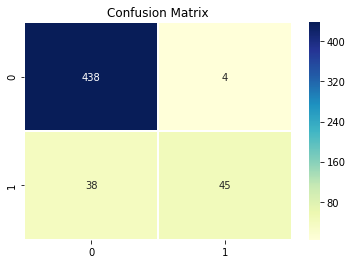

In [56]:
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm)
plt.title("Confusion Matrix")
sns.heatmap(df_cm,annot=True,fmt='d',cmap="YlGnBu",linewidths=0.5)
plt.show()